# Curve fitting 2
Sometimes, curve fitting requires having a function that matches the underlying physics.  In this case, the program is searching for parameters of a known function.

The scipy.optimize library has a fitting function that will adjust the parameters on an arbitrary function (Which you will write) to get the best fit.

Start by importing several useful libraries

In [4]:
import numpy as np # get array and matrix functions from here
import scipy.optimize as opt # will get curve_fit from here
import math  # get some engineering functions
import matplotlib.pyplot as plt # for plotting

Define a function for a damped sin wave. This is like the one from the first problem.

The arguments are a set of input x values (Like a list or array)
A vector of parameters

Function returns a set of results


In [7]:
# first p is the sin multiplier
# second p is the sin phase
# third p is the exponent weight
# fourth is an overall gain factor
def fds(xin,sm,sp,ew,gain):
    return [ gain*math.sin(sm*x+sp)*math.exp(-ew*x) for x in xin]



Make a quick plot to test things out...


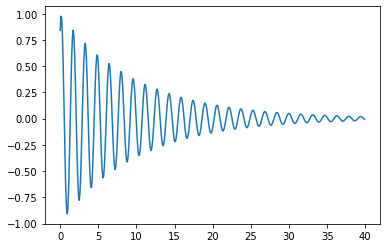

In [8]:
xv = [x/10 for x in range(400)] # create x values
yv = fds(xv,4,1,0.1,1) # just dummy values for now
plt.plot(xv,yv)
plt.show()

Now, try a curve fit to this data... See what parameters the software finds.


In [9]:
popt,pcov = opt.curve_fit(fds,xv,yv)
print(popt)

[-4.          5.28318531  0.1        -1.        ]


The Y data was generated with 4,1,0.1,1  The program didn't find that. But if you look closely, there are two negatives.  Plot both, and see what it looks like

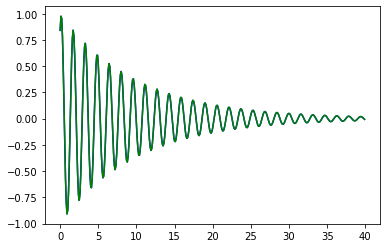

In [10]:
plt.plot(xv,yv,'b')
plt.plot(xv,fds(xv,*popt),'g')
plt.show()

The two curves are right on top of each other. The negatives cancel in the end, and the phase is 2*pi - 1, and is mathematicly the same phase

## noise
The power of curve fitting isn't fitting exact functions, but fitting functions with noise.

Noise tends to hide the signal. In theory, the average of noise is zero, and this means our desired curve is in the middle of the noise somewhere.

Python has random number function that can be used to generate values which can be addes to the y value to simulate noise.


In [6]:
import random
random.seed(1234)  # get the same random values each run


random.gauss will give a distribution.  It takes two parameters, the first is the average, and the second is the standard deviation.  

Make 100,000 random numbers, and then plot the histogram (How many times each value range appears)  It should look like a bell curve.

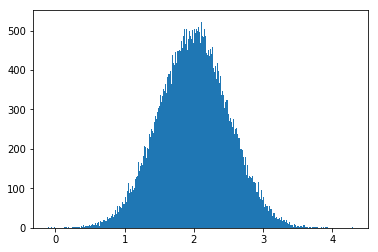

In [7]:
rv = [random.gauss(2,0.5) for x in range(100000)]
plt.hist(rv,700)
plt.show()

It will look like a bell curve if we have enough points... Try 10 million points...

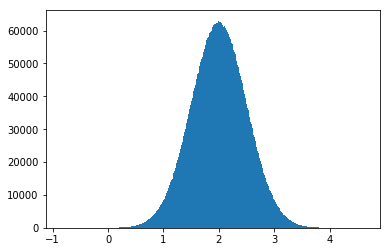

In [8]:
rv = [random.gauss(2,0.5) for x in range(10000000)]
plt.hist(rv,700)
plt.show()

Thats the law of large numbers.  It looks pretty good, but takes a while to run.

Now it is possible to create random numbers, and add them to the data. This will simulate noise for the curve fitting examples.  Repeat the above by adding some noise to the y values before the curve fitting.

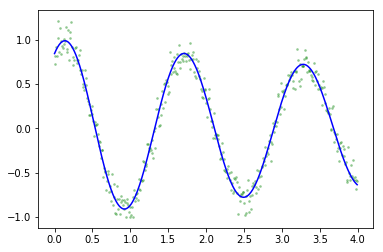

In [9]:
xv = [x/100 for x in range(400)] # create x values
yp = fds(xv,4,1,0.1,1) # perfect y values
yv = [ y+random.gauss(0,0.1) for y in yp] # values with noise
plt.plot(xv,yp,'b')
plt.scatter(xv,yv,alpha=0.3,s=3,c='green')
plt.show()

Now, perform the curve fitting and look at the results compared to the perfect curve. (Without any noise)

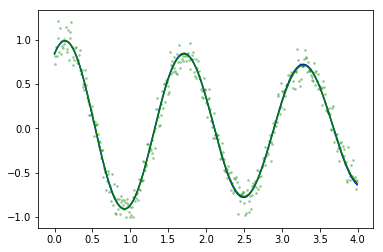

In [10]:
popt,pcov = opt.curve_fit(fds,xv,yv)
plt.plot(xv,yp,'b')
plt.plot(xv,fds(xv,*popt),'g')
plt.scatter(xv,yv,alpha=0.3,s=3,c='green')
plt.show()

The noise has confused the fit a little, but not too much It helps to plot the error between the perfect curve, and the fit curve. 

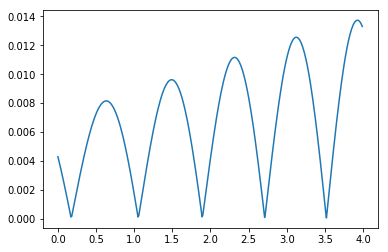

In [11]:
yf = fds(xv,*popt) # the fit points for the x values
plt.plot(xv,[abs(yf[ix]-yp[ix]) for ix in range(len(xv))])
plt.show()

The noise has thrown the fit curve from the perfect curve by up to 0.014 out of 0.5, or about 20%.  Try with more data in the curve fit, and see if things get better.

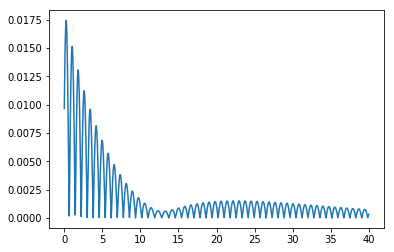

In [12]:
xv = [x/100 for x in range(4000)] # create x values
yp = fds(xv,4,1,0.1,1) # perfect y values
yv = [ y+random.gauss(0,0.1) for y in yp] # values with noise
popt,pcov = opt.curve_fit(fds,xv,yv)
yf = fds(xv,*popt) # the fit points for the x values
plt.plot(xv,[abs(yf[ix]-yp[ix]) for ix in range(len(xv))])
plt.show()

Having more samples in the curve fit decreased the error by the samples added. Now within about 1% of the perfect fit. Plot the two to see what they look like.

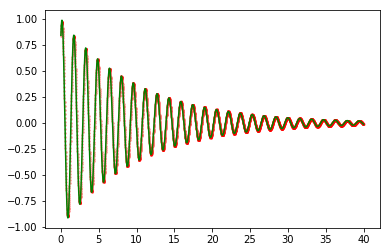

In [13]:
plt.plot(xv,yp,'g')
plt.scatter(xv,yf,alpha=0.3,s=3,c='red')
plt.show()

It looks like the phase is off a little.  Look at just the first few points to see more detail

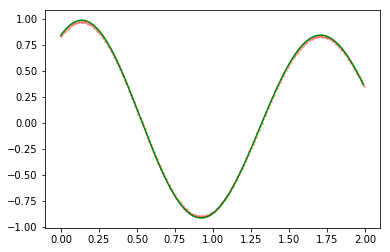

In [14]:
plt.plot(xv[:200],yp[:200],'g')
plt.scatter(xv[:200],yf[:200],alpha=0.3,s=3,c='red')
plt.show()